In [16]:
import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

# Load and extract data
data = load_data.load_data()
X,y  = load_data.extract_data(data)

In [17]:
# Split the dataset in train and test part
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [35]:
# Scaling data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

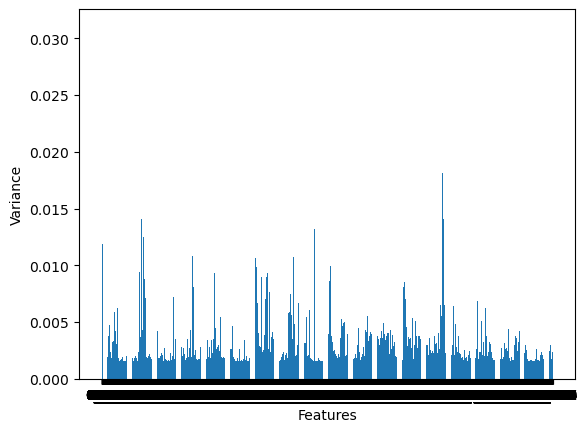

In [30]:
# Determine variances per feature
X_train.var(axis=0)

fig, ax = plt.subplots()
x = X_train.columns
y = X_train_scaled.var(axis=0)

ax.bar(x, y)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')

fig.autofmt_xdate
plt.tight_layout

In [64]:
# Threshold selection
variances = X_train_scaled.var()
threshold = 0.017
low_var_cols = variances[variances > threshold].index
X_train_selected = X_train.drop(columns=low_var_cols)



In [69]:
# RFE selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

rfe_f1_score_list = []

for k in range(1,X_train_scaled.shape[1]):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=3000)
    RFE_selector.fit(X_train_scaled.values, y_train.values)

    X_train_selected = RFE_selector.transform(X_train_scaled)

    gbc.fit(X_train_scaled.values, y_train.values)
    RFE_preds = gbc.predict(X_train_selected)

    f1_score_rfe = round(f1_score(y_train,RFE_preds, average='weighted'),3)
    rfe_f1_score_list.append(f1_score_rfe)






/Users/Gunnar/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but GradientBoostingClassifier is expecting 9000 features as input.

In [65]:
# Classification KNN
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train.values, y_train.values)

# Test the classifier on the training data and plot
score_train = clf_knn.score(X_train.values, y_train.values)
print(f"Training performance no feature selection: accuracy {score_train}")

# Classification KNN
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_selected.values, y_train.values)

# Test the classifier on the training data and plot
score_train = clf_knn.score(X_train_selected.values, y_train.values)
print(f"Training performance feature selection: accuracy {score_train}")

Training performance no feature selection: accuracy 0.8456883509833586
Training performance feature selection: accuracy 0.8472012102874432
